# Name : **Tanishta** **Varman**
# School :**SCDS**
# Email ID : *tanishta.m-26@scds.saiuniversity.edu.in*

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pathlib
import glob
import PIL
from PIL import Image , ImageEnhance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
print('modules loaded')


modules loaded


# Data breaking

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_class=os.listdir('/content/drive/MyDrive/Dl_project /data file')
number_class=len(data_class)
print("The number of classes the cats are sorted ",number_class)
print("The name of each type of cat ",data_class)

The number of classes the cats are sorted  7
The name of each type of cat  ['jungle-cat', 'domestic-cat', 'chinese-mountain-cat', 'european-wildcat', 'african-wildcat', 'sand-cat', 'blackfoot-cat']


# Sort Datasets with Label

In [4]:
path_of_file=[] # has all the images and their paths
file_label=[] #has the type or class of cat and its location
img_count=[] # count_images_class # number of images in each type or class
final_count=0 # total number of images

for index, nameofclass in enumerate(data_class):
  class_count=0
  file=os.path.join("/content/drive/MyDrive/Dl_project /data file", nameofclass)
  fileofclass=os.listdir(file)
  for i in fileofclass:
    path_of_file.append(os.path.join(file,i))
    final_count +=1
    class_count +=1
    file_label.append(nameofclass)
  img_count.append(class_count)

print("Total number of images ",final_count)
print("Number of images in each type of cat",img_count)


Total number of images  519
Number of images in each type of cat [86, 64, 42, 85, 91, 72, 79]


#### now we process the images we have since we cannot use them as it is

In [5]:
ex=[]
for i in path_of_file:
  j=Image.open(i)
  j=j.resize((224,224))
  j=np.array(j)/255 # we are making range to 0 to 1.0 we only scale we dont try to stretch the image
  ex.append(j)

from sklearn.preprocessing import LabelEncoder
end=LabelEncoder()
y=end.fit_transform(file_label)
print(set(y))
print(end.classes_)
ex=np.array(ex)
y=np.array(y)
print(ex.shape)
print(y.shape)


{0, 1, 2, 3, 4, 5, 6}
['african-wildcat' 'blackfoot-cat' 'chinese-mountain-cat' 'domestic-cat'
 'european-wildcat' 'jungle-cat' 'sand-cat']
(519, 224, 224, 3)
(519,)


 # Now we split the dataset for training and testing


##Transfer Learning


In [6]:
x_train,x_test,y_train,y_test=train_test_split(ex,y,test_size=0.25,random_state=42,stratify=y)
# we use stratify cause the types on the data set are not balanced some has more and some has less images
print("shape of x_train {}".format(x_train.shape))
print("shape of x_test{} ".format(x_test.shape))
print(len(x_train))
print(len(x_test))
print("shape of y_train {}".format(y_train.shape))
print("shape of y_test{} ".format(y_test.shape))
print(len(y_train))
print(len(y_test))

shape of x_train (389, 224, 224, 3)
shape of x_test(130, 224, 224, 3) 
389
130
shape of y_train (389,)
shape of y_test(130,) 
389
130


now we standardise the data sets

In [7]:
mean_x=x_train.mean()
std=x_train.std()
x_train_std=(x_train - mean_x) / std
x_test_std=(x_test - mean_x) / std

Then after that we do Transfer Learning

In [8]:
base= keras.applications.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    name="efficientnetv2-b0",
)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


we can not make changes to the acquried model .


we do this so not all weights are used and updated during backpropagation

In [9]:
for i in base.layers:
  i.trainabe=False

# Add Classifier

In [10]:
# we will do global average pooling
gp=keras.layers.GlobalAveragePooling2D()(base.output)
x = Dropout(0.15)(gp)
op=keras.layers.Dense(units=7, activation='softmax')(x)
tl_model=keras.models.Model(inputs=[base.input],outputs=[op])


tl_model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
tl_calback=[ keras.callbacks.ModelCheckpoint('bestTL.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)]

tl_hist=tl_model.fit(x= x_train_std , y=y_train , validation_split=0.1, batch_size=32,epochs=10 , callbacks=tl_calback)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.2871 - loss: 1.7898 - val_accuracy: 0.0769 - val_loss: 1.9949
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.8955 - loss: 0.4948 - val_accuracy: 0.2308 - val_loss: 1.9763
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.9637 - loss: 0.1640 - val_accuracy: 0.2821 - val_loss: 2.1393
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9812 - loss: 0.0795 - val_accuracy: 0.2308 - val_loss: 3.0162
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9898 - loss: 0.0541 - val_accuracy: 0.2308 - val_loss: 2.9305
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9712 - loss: 0.0947 - val_accuracy: 0.0513 - val_loss: 2.6856
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9727 - loss: 0.0795 - val_accuracy: 0.0513 - val_loss: 3.4319
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9555 - loss: 0.1057 - val_accuracy: 0.

# Graph

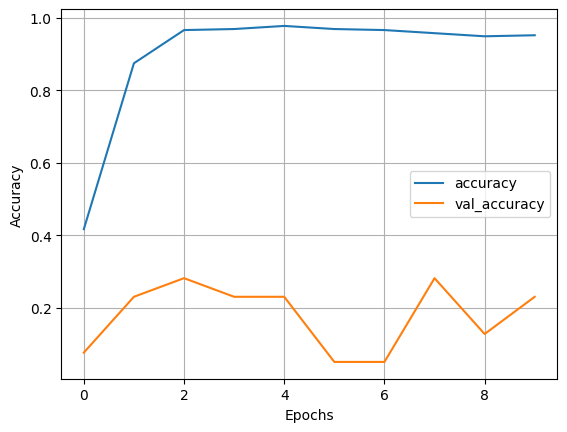

In [11]:
keys=['accuracy' , 'val_accuracy']
progress = { k:v for k , v in tl_hist.history.items() if k in keys}
import pandas as pd
pd.DataFrame(progress).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# We are saving the best models in models_3

## Loss percentage of the models and models Accuracy

In [12]:
testloss_tl , testaccuracy_tl = tl_model.evaluate(x=x_test_std , y=y_test)
print("Test-Loss : %f , Test -Accuracy : %f " % (testloss_tl,testaccuracy_tl))



5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1775 - loss: 3.4976
Test-Loss : 3.457524 , Test -Accuracy : 0.161538 


In [13]:
tl_model.load_weights("bestTL.weights.h5")
testlostt_tl , testaccuracy_tl =tl_model.evaluate(x=x_test_std, y=y_test)
print("Test-Loss : %f , Test -Accuracy : %f " % (testloss_tl,testaccuracy_tl))
tl_model.save('/content/drive/MyDrive/Models_3_TL/01_EfficientNetV2B01_TransferLearning_Best_Model.h5')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2277 - loss: 2.1186


Test-Loss : 3.457524 , Test -Accuracy : 0.207692 


In [14]:
from numpy import save
save ('/content/drive/MyDrive/Models_3_TL/X_train_std.npy' , x_train_std)
save( '/content/drive/MyDrive/Models_3_TL/X_test_std.npy' , x_test_std)
save('/content/drive/MyDrive/Models_3_TL/y_train.npy', y_train)
save('/content/drive/MyDrive/Models_3_TL/y_test.npy', y_test)